# Presentacion : Estadistica Descriptiva

La estadística descriptiva es la rama de la estadística que analiza breves coeficientes descriptivos que resumen un conjunto de datos dado. Estos coeficientes se denominan "estadísticas descriptivas".



In [2]:
import numpy as np # algebra lineal 
import matplotlib.pyplot as plt # visualizacion
import seaborn as sns # visualizacion
import pandas as pd # dataframes 

import random as rnd
import math as m

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Ejemplo con iris

In [3]:
# CArgamos la data
iris = sns.load_dataset("iris")

# mostramos todos los datasets de ejemplo de seaborn
# sns.get_dataset_names()

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.shape

In [ ]:
iris.info()


In [ ]:
# VEamos que el data frame esta limpio

iris.isnull().sum()

Aquí voy a detenerme en algunas estadísticas descriptivas utilizando paquetes estadísticos en Python.Veamos solo una característica ("sepal_length").




In [6]:
# Eliminamos (removemos) la columna "species" (No - numerica)
X = iris.drop('species',axis=1)

# Separamos la variable a analizar : 'sepal_length'
x=X['sepal_length']

X.head()




,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Variable a estudiar : x 

x.head()

# type(x)
# dir(x)

x[x==5]

x[x==5].shape


# Algunos calculos para encontrar la moda
np.unique(x)
Vals , numVals = np.unique(x, return_counts=True)

SepalLen = pd.DataFrame({"Vals":Vals , "numVals":numVals})
SepalLen[SepalLen.numVals == np.max(SepalLen.numVals)]

In [ ]:
# Medidas de tendencia central :

print("""El promedio aritmetico de sepal_length : %.3f \n 
La media de  de sepal_length : %.3f \n
La moda de  de sepal_length : %.3f"""%(x.mean(),np.median(x) , x.mode())
)

In [ ]:
# Percentiles, deciles, cuartiles 

Q = np.quantile(x , [0.25,0.5,0.75])

P12 = np.quantile(x, 0.12)

D50 = np.quantile(x, 0.5)


In [ ]:
# Medidas de dispersion:

print("""
La desviacion estandar de sepal_length : %.3f \n 
La varianza de  de sepal_length : %.3f \n
El Coeficiente de variacion de  de sepal_length : %.3f %%"""%(np.std(x), x.var(), np.std(x)/x.mean()*100)
)

In [ ]:
# Medidas de forma y concentracion

print("""
La kurtosis de sepal_length : %.3f \n 
El coeficiente de asimetria de  de sepal_length : %.3f \n"""%(x.kurt(), x.skew())
)



In [ ]:
x.mode()[0]

## Algunos graficos muy intuitivos

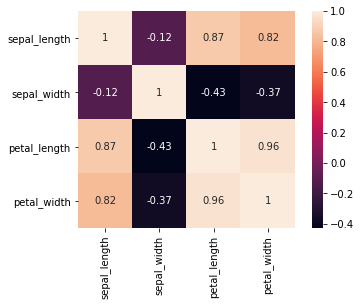

In [4]:
corrmat = iris.corr()
sns.heatmap(corrmat, annot = True, square = True);

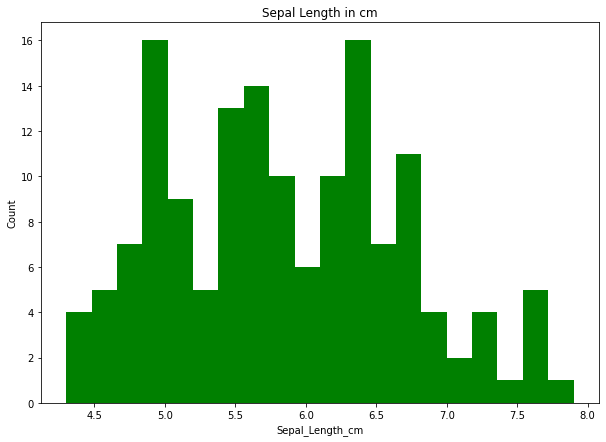

In [7]:
plt.figure(figsize = (10, 7)) 

plt.hist(x, bins = 20, color = "green") 
plt.title("Sepal Length in cm") 
plt.xlabel("Sepal_Length_cm") 
plt.ylabel("Count") 
plt.show()

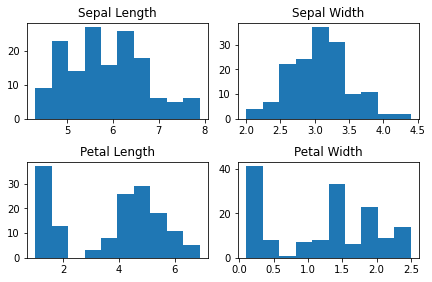

In [8]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(X['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(X['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(X['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(X['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');# add some spacing between subplots
fig.tight_layout(pad=1.0);

In [ ]:

plt.figure(figsize = (10, 7)) 
X.boxplot() 
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="species",y="sepal_length",data=iris)
plt.subplot(2,2,2)
sns.boxplot(x="species",y="sepal_width",data=iris)
plt.subplot(2,2,3)
sns.boxplot(x="species",y="petal_length",data=iris)
plt.subplot(2,2,4)
sns.boxplot(x="species",y="petal_width",data=iris)
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x="species",y="sepal_length",data=iris)
plt.subplot(2,2,2)
sns.violinplot(x="species",y="sepal_width",data=iris)
plt.subplot(2,2,3)
sns.violinplot(x="species",y="petal_length",data=iris)
plt.subplot(2,2,4)
sns.violinplot(x="species",y="petal_width",data=iris)
plt.show()

In [ ]:
sns.FacetGrid(iris,hue="species").map(plt.scatter,"sepal_length","sepal_width").add_legend()
plt.show()

In [ ]:
sns.FacetGrid(iris,hue="species").map(plt.scatter,"petal_length","petal_width").add_legend()
plt.show()

In [ ]:
sns.pairplot(iris, hue="species", height = 2, palette = 'colorblind');

In [ ]:
# Veamos la distribucion de esta variables : media, mediana , moda, boxplot y su distribucion

plt.rcParams['figure.figsize'] = (14,10)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1.5)})

sns.boxplot(x, ax=ax_box)
ax_box.axvline(x.mean(), color='r', linestyle='--')
ax_box.axvline(np.median(x), color='g', linestyle='-')
ax_box.axvline(x.mode()[0], color='b', linestyle='-')

sns.distplot(x, ax=ax_hist )
ax_hist.axvline(x.mean(), color='r', linestyle='--')
ax_hist.axvline(np.median(x), color='g', linestyle='-')
ax_hist.axvline(x.mode()[0], color='b', linestyle='-')

plt.legend({'Media Arit.':x.mean(),'Mediana':np.median(x),'Moda':x.mode()[0]})

ax_box.set(xlabel=' ')
plt.xlabel('Var. Name : ' + x.name)
plt.title('Distribucion de ' + x.name, y = 1.3,size = 22)
plt.show()

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

Q1, Q2, Q3 = np.quantile(x , [0.25,0.5,0.75])

sns.boxplot(x, ax=ax_box)
ax_box.axvline(Q1, color='r', linestyle='--')
ax_box.axvline(Q2, color='g', linestyle='-')
ax_box.axvline(Q3, color='b', linestyle='-')

sns.distplot(x, ax=ax_hist)
ax_hist.axvline(Q1, color='r', linestyle='--')
ax_hist.axvline(Q2, color='g', linestyle='-')
ax_hist.axvline(Q3, color='b', linestyle='-')

plt.legend({'Q1':Q1,'Q2':Q2,'Q3':Q3})

ax_box.set(xlabel='')
plt.show()

**Las estadísticas descriptivas se utilizan para describir las características básicas de los datos en un estudio. Proporcionan resúmenes simples sobre los datos y, junto con un análisis gráfico simple, forman la base de cada análisis estadístico y de aprendizaje automático.**